In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
gen_data = pd.read_csv("/workspaces/codespaces-jupyter/data/Plant_1_Generation_Data.csv")
weather_data = pd.read_csv("/workspaces/codespaces-jupyter/data/Plant_1_Weather_Sensor_Data.csv")


In [16]:
gen_data["DATE_TIME"] = pd.to_datetime(gen_data["DATE_TIME"])
weather_data["DATE_TIME"] = pd.to_datetime(weather_data["DATE_TIME"])

/tmp/ipykernel_10973/1933175422.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gen_data["DATE_TIME"] = pd.to_datetime(gen_data["DATE_TIME"])


In [17]:
merged_data = pd.merge(gen_data, weather_data, on="DATE_TIME", how="inner")

In [18]:
weather_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [19]:
print("Basic Info:")
print(merged_data.info())
print("\nMissing Values:")
print(merged_data.isnull().sum())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   PLANT_ID_x           68774 non-null  int64         
 2   SOURCE_KEY_x         68774 non-null  object        
 3   DC_POWER             68774 non-null  float64       
 4   AC_POWER             68774 non-null  float64       
 5   DAILY_YIELD          68774 non-null  float64       
 6   TOTAL_YIELD          68774 non-null  float64       
 7   PLANT_ID_y           68774 non-null  int64         
 8   SOURCE_KEY_y         68774 non-null  object        
 9   AMBIENT_TEMPERATURE  68774 non-null  float64       
 10  MODULE_TEMPERATURE   68774 non-null  float64       
 11  IRRADIATION          68774 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 6.3+ MB


In [20]:
print("\nSummary Statistics:")
print(merged_data.describe())


Summary Statistics:
                           DATE_TIME  PLANT_ID_x      DC_POWER      AC_POWER  \
count                          68774     68774.0  68774.000000  68774.000000   
mean   2020-06-01 08:02:38.161514240   4135001.0   3147.177450    307.778375   
min              2020-05-15 00:00:00   4135001.0      0.000000      0.000000   
25%              2020-05-24 00:33:45   4135001.0      0.000000      0.000000   
50%              2020-06-01 14:15:00   4135001.0    428.571429     41.450000   
75%              2020-06-09 20:00:00   4135001.0   6365.468750    623.561161   
max              2020-06-17 23:45:00   4135001.0  14471.125000   1410.950000   
std                              NaN         0.0   4036.441826    394.394865   

        DAILY_YIELD   TOTAL_YIELD  PLANT_ID_y  AMBIENT_TEMPERATURE  \
count  68774.000000  6.877400e+04     68774.0         68774.000000   
mean    3295.834644  6.978728e+06   4135001.0            25.558521   
min        0.000000  6.183645e+06   4135001.0   

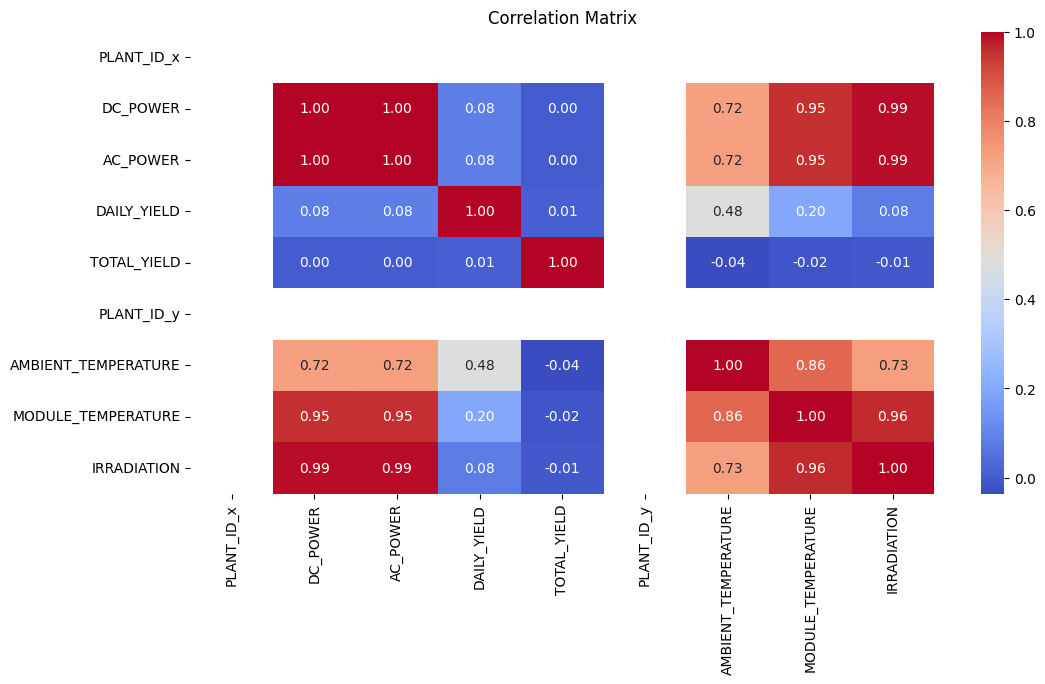

In [22]:
numeric_data = merged_data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [23]:
corr_matrix = numeric_data.corr()
target_correlation = corr_matrix["AC_POWER"].abs().sort_values(ascending=False)
important_features = target_correlation[target_correlation > 0.2].index.tolist()
print("Important Features:", important_features)

Important Features: ['AC_POWER', 'DC_POWER', 'IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE']


In [24]:
X = numeric_data[important_features].drop(columns=["AC_POWER"], errors='ignore')
y = numeric_data["AC_POWER"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Model")
    print("MAE:", mae)
    print("MSE:", mse)
    print("R2 Score:", r2)
    print("---------------------------")
    return {"Model": model_name, "MAE": mae, "MSE": mse, "R2": r2}

In [28]:
svr_results = evaluate_model(SVR(), X_train_scaled, X_test_scaled, y_train, y_test, "SVR")

SVR Model
MAE: 5.084066247431671
MSE: 240.28109617509423
R2 Score: 0.9984428113692767
---------------------------


In [29]:
rf_results = evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test, "Random Forest")

Random Forest Model
MAE: 0.13316724033390137
MSE: 1.2310032920382261
R2 Score: 0.9999920222424433
---------------------------
